In [26]:
import pandas as pd
import numpy as np
import math
from datetime import date, datetime
import matplotlib.pyplot as plt

PATH_TO_COVID_DATA = "data/covid19cases_test.csv"

covid_data = pd.read_csv(PATH_TO_COVID_DATA)

In [41]:
def create_date_offset(
        data: pd.DataFrame = covid_data,
        date_to_subtract: datetime.date = datetime.strptime(
            "2020-02-01", "%Y-%m-%d")
) -> pd.Series:
    """
    Takes in covid_data df and returns date offset column
    """

    date_col = [math.nan if d is np.nan else (datetime.strptime(
        d, "%Y-%m-%d") - date_to_subtract).days for d in data["date"]]

    return date_col


covid_data["date_offset"] = create_date_offset()

In [51]:
covid_data.head()
set(covid_data["area"])

{'Alameda',
 'Alpine',
 'Amador',
 'Butte',
 'Calaveras',
 'California',
 'Colusa',
 'Contra Costa',
 'Del Norte',
 'El Dorado',
 'Fresno',
 'Glenn',
 'Humboldt',
 'Imperial',
 'Inyo',
 'Kern',
 'Kings',
 'Lake',
 'Lassen',
 'Los Angeles',
 'Madera',
 'Marin',
 'Mariposa',
 'Mendocino',
 'Merced',
 'Modoc',
 'Mono',
 'Monterey',
 'Napa',
 'Nevada',
 'Orange',
 'Out of state',
 'Placer',
 'Plumas',
 'Riverside',
 'Sacramento',
 'San Benito',
 'San Bernardino',
 'San Diego',
 'San Francisco',
 'San Joaquin',
 'San Luis Obispo',
 'San Mateo',
 'Santa Barbara',
 'Santa Clara',
 'Santa Cruz',
 'Shasta',
 'Sierra',
 'Siskiyou',
 'Solano',
 'Sonoma',
 'Stanislaus',
 'Sutter',
 'Tehama',
 'Trinity',
 'Tulare',
 'Tuolumne',
 'Unknown',
 'Ventura',
 'Yolo',
 'Yuba'}

In [48]:
def create_normalized_cases(data: pd.DataFrame = covid_data) -> pd.Series:
    """
    Create normalized cases column
    """

    return data["cases"] / data["population"]


covid_data["normalized_cases"] = create_normalized_cases()

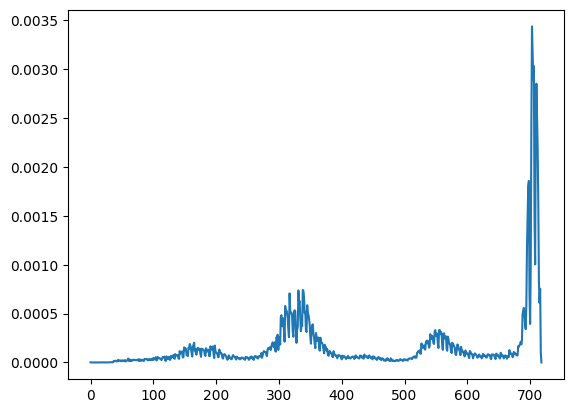

In [52]:
example_county = covid_data.loc[
    covid_data["area"] == "Alameda"
]
plt.plot(example_county["date_offset"], example_county["normalized_cases"])